In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pydicom as pyd
import SimpleITK as sk
import math
import numpy as np
from numpy import savetxt
import torch

In [83]:
class DICOM_reader:
    def __init__(self):
        self.file_path = ""
        self.CT_images = []
    
    def set_path(self, path):
        self.file_path = Path(path)
    
    def extract_images(self):
        file_ids = sk.ImageSeriesReader.GetGDCMSeriesIDs(str(self.file_path))
        file_names = sk.ImageSeriesReader.GetGDCMSeriesFileNames(str(self.file_path), file_ids[0])
        series_reader = sk.ImageSeriesReader()
        series_reader.SetFileNames(file_names)
        image_data = series_reader.Execute()
        self.CT_images = sk.GetArrayFromImage(image_data)
                
    def visualize(self, images, if_all, idx=None):
        if if_all:
            idx = list(range(len(images)))
        num1 = math.ceil(math.sqrt(len(idx)))
        num2 = math.floor(math.sqrt(len(idx)))
        num1 = num1+1 if num1*num2<len(idx) else num1
        fig, axis = plt.subplots(num2, num1, figsize=(20,20))
        slice_counter = 0
        if len(idx)==1:
            axis.imshow(images[idx[slice_counter]], cmap="gray")
        else:
            if num2>1:
                for i in range(num2):
                    for j in range(num1):
                        if slice_counter<len(idx):
                            axis[i][j].imshow(images[idx[slice_counter]], cmap="gray")
                            slice_counter+=1
                        else:
                            break
            else:
                for i in range(num1):
                    axis[i].imshow(images[idx[slice_counter]], cmap="gray")
                    slice_counter+=1
                                
    def get_images(self):
        # self.CT_images = [np.expand_dims(np.array(image.astype("int32")),axis=0) for image in self.CT_images]
        return self.CT_images

In [84]:
reader = DICOM_reader()
reader.set_path("/Users/wangyangwu/Documents/Maastro/NeuralNets/PROTON/P0439C0006I1473766/CT/1.3.6.1.4.1.32722.228.6.63207665478764726756566005696578074318")
reader.extract_images()
# reader.visualize(True)
a = reader.get_images()
a.shape

(189, 512, 512)

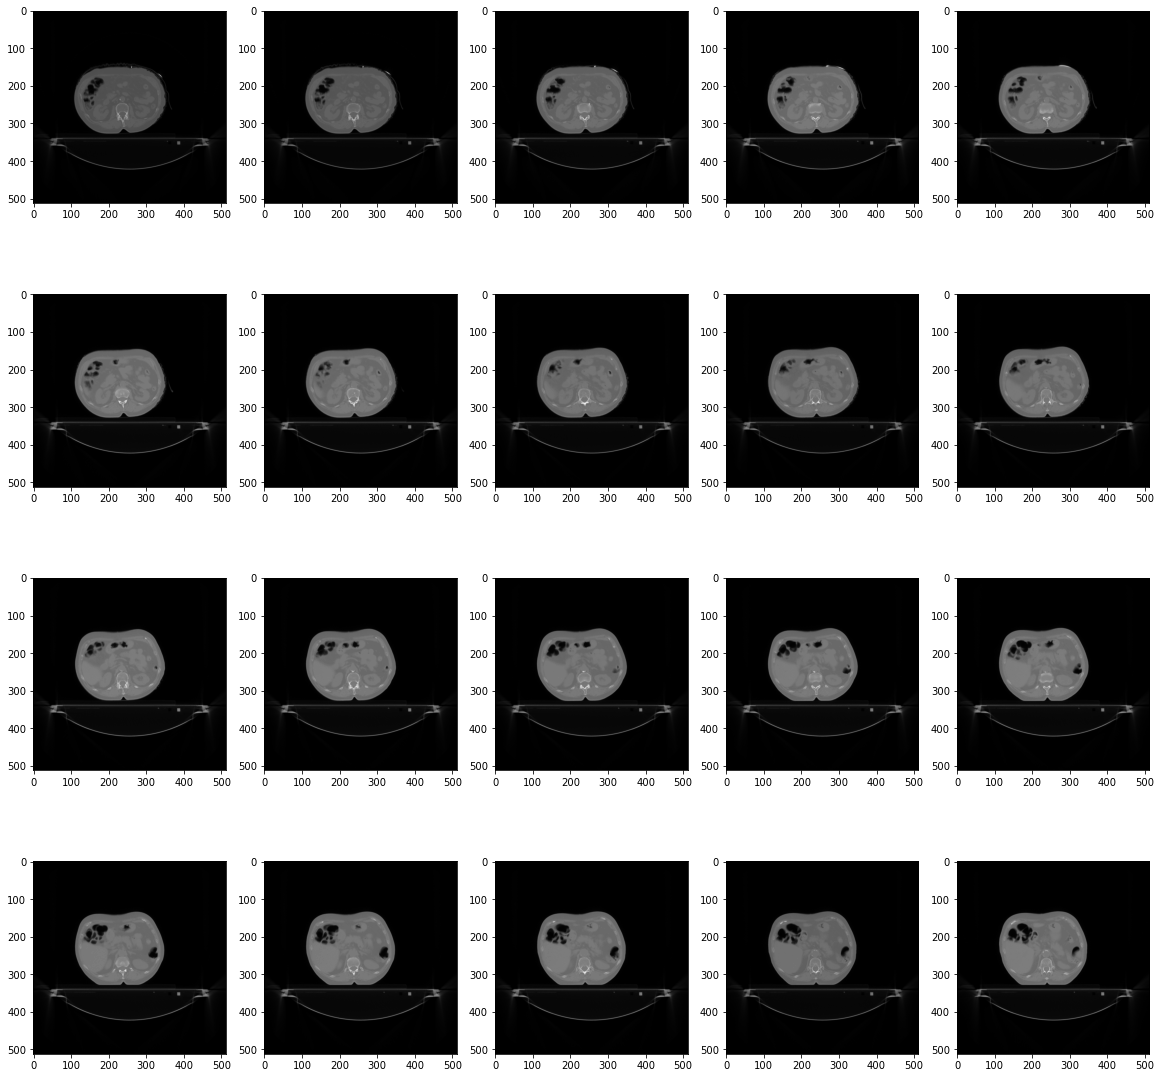

In [87]:
reader.visualize(a, False, list(range(0,20)))

In [66]:
a = pyd.dcmread("/Users/wangyangwu/Documents/Maastro/NeuralNets/PROTON/P0439C0006I1473766/RTPLAN/1.3.6.1.4.1.32722.228.6.325532840834941086293153567721883963193/1.3.6.1.4.1.32722.228.6.313844532121869153388299621581934496436.dcm")

In [71]:
a

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: RT Ion Plan Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.32722.228.6.313844532121869153388299621581934496436
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4-JP'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0012) Instance Creation Date              DA: '20191107'
(0008, 0013) Instance Creation Time              TM: '192909'
(0008, 0016) SOP Class UID                       UI: RT Ion Plan Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.32722.228.6.31384453212186915338829962